## Create 2D spectrogram dataset from 1D raw data

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from pathlib import Path
import os
%matplotlib inline
plt.rcParams.update({'font.size': 15})

## Load Dataset

In [83]:
wd = Path(os.getcwd()).parent
#wd = Path(os.getcwd())
fname = '_M_2.8_R_0.5_S_4_Sec_256.npy'
data_fname = Path(os.path.join(wd, 'Datasets', 'Data' + fname))
time_fname = Path(os.path.join(wd, 'Datasets', 'Time' + fname))
label_fname = Path(os.path.join(wd, 'Datasets', 'Label' + fname))
events = np.load(data_fname) # features, # samples
labels = np.load(label_fname) # samples, 1
times = np.load(time_fname) # features, # samples
times = (times - times[0,:]) * 3600 * 24 # set time to 0 and in seconds
fs = (times[:,0] < 60).nonzero()[0].shape[0] / 60 # sampling frequency
_, _, Sxx = spectrogram(events[:,0], fs)
spectrogram_shape = Sxx.shape
print(spectrogram_shape)

(129, 45)


## Create Spectrograms and save to file

In [84]:
import pickle

data = np.zeros((events.shape[1], spectrogram_shape[0], spectrogram_shape[1]))
for i in range(events.shape[1]):
    _, _, Sxx = spectrogram(events[:,i], fs)
    data[i, :, :] = np.log10(Sxx)

data = data[:,:,:,np.newaxis]     
out_fname = 'Data' + fname[:-4] + '_2D_' + str(spectrogram_shape[0]) + '_' + str(spectrogram_shape[1]) + '.pkl'
out_data_path = Path(os.path.join(wd, 'Datasets', out_fname))

output = open(out_data_path, 'wb')
pickle.dump(data, output)
output.close()


## How to load pickle file

In [86]:
import pickle
pkl_file = open(out_data_path, 'rb')
data = pickle.load(pkl_file)
print(data1.shape)

(770, 129, 45, 1)


## How to plot spectrogram

C:\Users\nathens\Anaconda2\envs\deeplearning\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


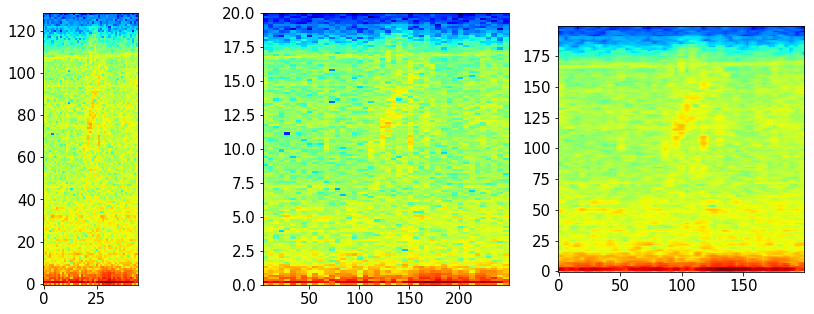

In [87]:
from skimage.transform import rescale, resize, downscale_local_mean

sample = 2
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
x = events[:,sample]
f, t, Sxx = spectrogram(x, fs)
plt.imshow(np.log10(Sxx), origin='lower', cmap='jet')

fig.add_subplot(1, 3, 2)
x = events[:,sample]
f, t, Sxx = spectrogram(x, fs)
plt.pcolormesh(t, f, np.log10(Sxx), cmap='jet')

fig.add_subplot(1, 3, 3)
Sxx_resized = resize(Sxx, (200, 200))
plt.imshow(np.log10(Sxx_resized), origin='lower', cmap='jet')

